In [1]:
### This cell has placeholder data, if for some reason data cannot be read from the csv file
import pandas as pd

data = {
    'date': ['2024-08-27', '2024-08-28', '2024-08-29'],
    'MMM': [0.6, 0.7, 0.5],
    'GOOGL': [0.6, 0.8, 0.9],
    'ALL': [0.3, 0.2, 0.7],
}


# Create the DataFrame
df = pd.DataFrame(data)

In [2]:
### This cell imports the aggregated percent_return.csv data as a Pandas dataframe
import pandas as pd

filepath = 'data/2024-08-20_2024-08-28/aggregated/percent_return.csv'
df = pd.read_csv(filepath)
# Set 'date' as the index
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

Original Data:
                   A       AAL      AAPL      ABBV      ABNB       ABT  \
date                                                                     
2024-08-20 -0.604556 -0.193991  0.327763 -0.492087 -1.311590 -0.939012   
2024-08-21  0.007151  0.289293 -0.052980  0.045814 -0.304982  0.378479   
2024-08-22 -3.549321 -2.593655 -1.431140 -0.324856 -1.894972  0.277303   
2024-08-23 -0.240784  1.564035  0.522907  0.152093  0.180040  0.258008   
2024-08-26 -0.439370 -2.109303  0.185217 -0.060739 -0.975609 -0.035481   
2024-08-27  0.441351 -0.877194  0.898230 -1.045511  1.248911  0.035380   

                ACGL       ACN      ADBE       ADI  ...       WTW        WY  \
date                                                ...                       
2024-08-20 -0.165095  0.133362 -0.395050 -0.600793  ...  0.000000 -0.886374   
2024-08-21  1.356591  0.834243  0.651090 -1.268410  ...  0.162415  0.067980   
2024-08-22  1.680193 -0.994342 -1.698204 -2.055718  ...  0.670818 -1.113459 

In [3]:
### This cell creates the absolute correlation matrix for the company daily return data.

# Compute the correlation matrix
abs_corr_matrix = df.corr().abs()

print("\nAbsolute Correlation Matrix:")
print(abs_corr_matrix.head())

# Convert correlation to dissimilarity
dissimilarity_matrix = 1 - abs_corr_matrix

print("\nDissimilarity Matrix:")
print(dissimilarity_matrix.head())



Absolute Correlation Matrix:
             A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.599691  0.939133  0.089338  0.770071  0.134033  0.302000   
AAL   0.599691  1.000000  0.573182  0.324521  0.495119  0.000859  0.222627   
AAPL  0.939133  0.573182  1.000000  0.247899  0.783155  0.288920  0.361505   
ABBV  0.089338  0.324521  0.247899  1.000000  0.341382  0.361958  0.427492   
ABNB  0.770071  0.495119  0.783155  0.341382  1.000000  0.257035  0.146604   

           ACN      ADBE       ADI  ...       WTW        WY      WYNN  \
A     0.915393  0.707404  0.636090  ...  0.209866  0.167775  0.423294   
AAL   0.274760  0.066090  0.419187  ...  0.876109  0.851985  0.818091   
AAPL  0.849723  0.636818  0.786043  ...  0.276415  0.170029  0.237985   
ABBV  0.215356  0.552409  0.575797  ...  0.447428  0.543768  0.450976   
ABNB  0.793042  0.678317  0.905711  ...  0.242403  0.260471  0.446886   

           XEL       XOM       XYL       YUM       ZBH      ZB

Text(0.5, 1.0, 'Absolute Correlation Heatmap for Stock Daily Return')

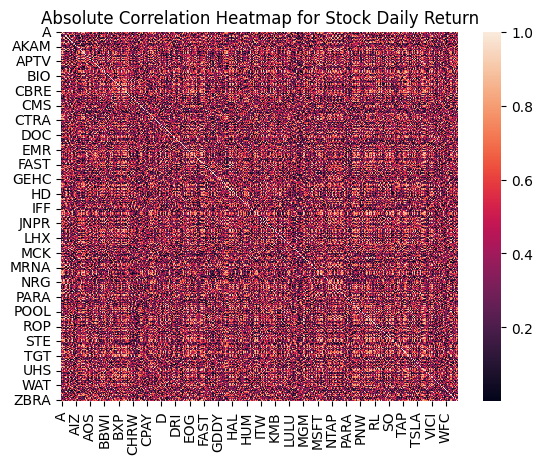

In [4]:
### This cell creates a heatmap for the absolute correlation matrix

import seaborn as sns

sns.heatmap(abs_corr_matrix).set_title("Absolute Correlation Heatmap for Stock Daily Return")


Text(0.5, 1.0, 'Dissimilarity Heatmap for Stock Daily Return')

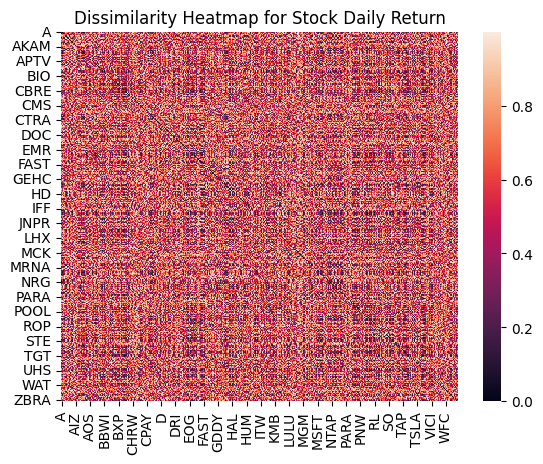

In [5]:
### This cell creates a heatmap for the dissimilarity matrix

sns.heatmap(dissimilarity_matrix).set_title("Dissimilarity Heatmap for Stock Daily Return")

Text(0.5, 1.0, 'Absolute Correlation Heatmap for Tech and Healthcare Companies')

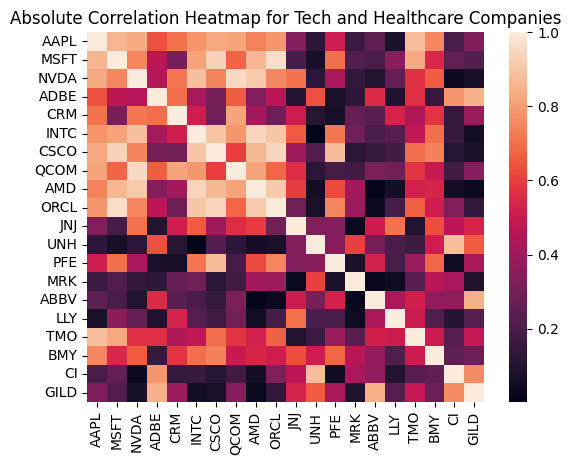

In [6]:
# Companies from Technology and Healthcare sectors
tech_companies = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']
healthcare_companies = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']

selected_companies = tech_companies + healthcare_companies

abs_corr_matrix = (df[selected_companies].corr()).abs()

# Plot heatmap for 20 selected companies
sns.heatmap(abs_corr_matrix).set_title("Absolute Correlation Heatmap for Tech and Healthcare Companies")

Text(0.5, 1.0, 'Dissimilarity Heatmap for Tech and Healthcare Companies')

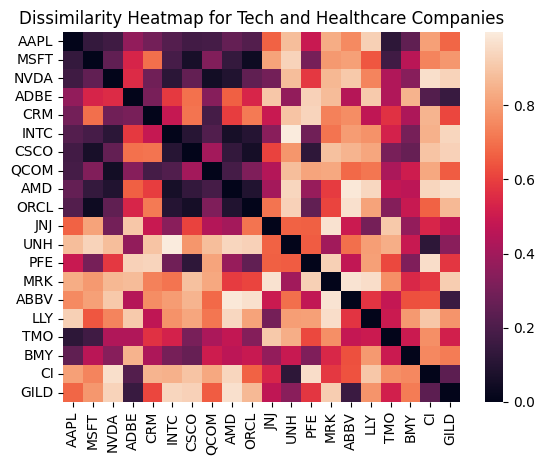

In [7]:
# Plot dissimilarity heatmap for 20 selected companies
sns.heatmap(1 - abs_corr_matrix).set_title("Dissimilarity Heatmap for Tech and Healthcare Companies")

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Calculate linkage using dissimilarity matrix

dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')

/var/folders/wg/dnpvhzfd233341pk2_x6jdpm0000gn/T/ipykernel_64085/1719917102.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')


In [9]:
# Turn data into a set of points
data = list(zip(df.values.flatten()))

# Select the 10 selected tech companies

tech_data = df[['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']]

# Compute linkage for top 10 tech companies

tech_dissimilarity = linkage(tech_data, method = 'complete')

# Get the 10 selected healthcare companies from DataFrame

healthcare_data = df[['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']]

# Compute linkage for top 10 healthcare companies

healthcare_dissimilarity = linkage(healthcare_data, method='complete')

In [10]:
# Get dissimilarity for both of the selected tech and healthcare companies

selected_dissimilarity = linkage(df[selected_companies], method='complete')
